# RL Lag Design 10-25

In [60]:
import requests as req,os
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath #, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

def writefile(filename, Gc):
    with open(filename+"_zero.txt", "w") as f:
        f.write(str(f"{np.real(-Gc.zeros())[0]:4.3f}"))
    with open(filename+"_pole.txt", "w") as f:
        f.write(str(f"{np.real(-Gc.poles())[0]:4.3f}"))
    with open(filename+"_gain.txt", "w") as f:
        gain = Gc.num[0][0]/Gc.den[0][0]
        f.write(str(f"{gain[0]:4.2f}"))

Running Python: 3.8.19
Running Sympy: 1.12.1
Control Package Found
Basic file found


In [61]:
G = tf((0, 10), np.convolve((1,0),np.convolve((1,5),(1,10))))

# Goals
Mp = 0.2
Ts = 4 # 2%
#
zeta = np.sqrt(np.log(Mp)**2/(np.pi**2+np.log(Mp)**2))
#
wn = 4/zeta/Ts # 2%
wd = wn*np.sqrt(1-zeta**2)

# Target Poles
s0 = np.roots([1, 2*zeta*wn, wn**2])
print(f"{zeta= :.3f}")
print(f"{wn= :.3f}")
print(f"{wd= :.3f}")

zeta= 0.456
wn= 2.193
wd= 1.952


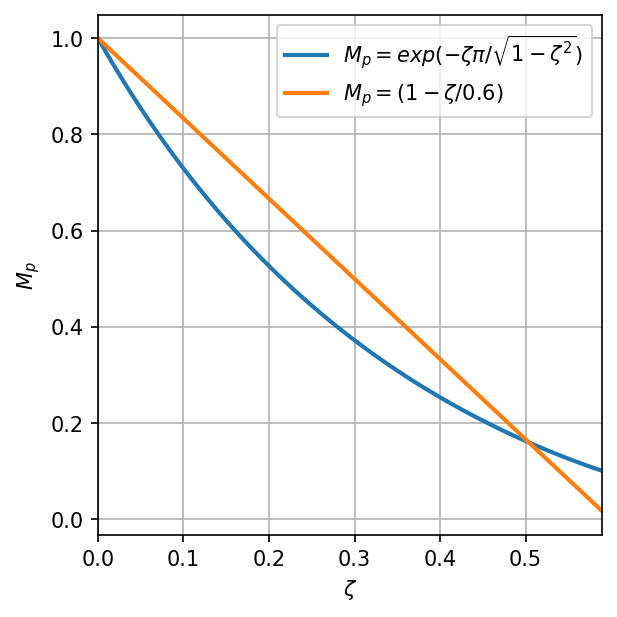

In [62]:
# Check the approximate Mp specification
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
Zeta = np.arange(0,0.6,1/100)
plt.plot(Zeta,np.exp(-Zeta*np.pi/np.sqrt(1-Zeta**2)),label='$M_p = exp(-\zeta\pi/\sqrt{1-\zeta^2})$')
plt.plot(Zeta,(1-Zeta/0.6),label='$M_p = (1-\zeta/0.6)$')
plt.xlabel('$\zeta$')
plt.ylabel('$M_p$')
plt.legend()
plt.show()

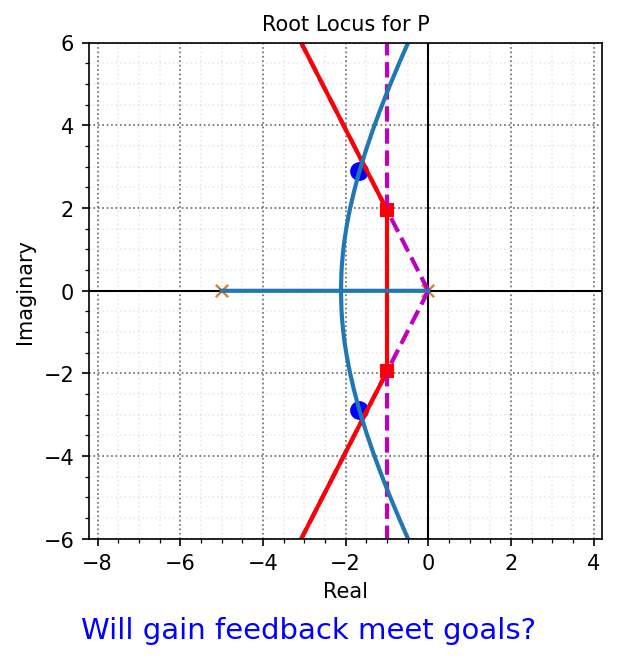

In [63]:
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(G,ax=ax,grid=False)
scl = rlocus(G,kvect=13,grid=False)

ax.plot(s0.real,s0.imag,'rs',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.axis('equal')
ax.set_xlim([-6, 2])
ax.set_ylim([-6, 6])
ax.set_title('Root Locus for P')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')
caption("Will gain feedback meet goals?",fig,yloc=-0.05)
savefig("./figs/L12_RL_des1.pdf", dpi=600)
plt.show()

## Lag Design on 11-26

In [64]:
# Lag Design
Kdesign = 13 
Kv_req = 1/0.05
gamma = 10
b = np.real(abs(s0[0])/gamma)
a =  b/(Kv_req/(G.num[0][0][-1]/G.den[0][0][-2])/Kdesign)

In [69]:
Gc_lag = Kdesign*tf((1, b), (1, a))
L = Gc_lag*G
Lag_gain = np.squeeze(Gc_lag.num)[0]/np.squeeze(Gc_lag.den)[0]
print(f"{Lag_gain = :.3f}")
print(f"{np.real(Gc_lag.zeros()[0]) = :.3f}")
print(f"{np.real(Gc_lag.poles()[0]) = :.3f}")

writefile(source+"Gc_10_27", Gc_lag)

Gc_lag

Lag_gain = 13.000
np.real(Gc_lag.zeros()[0]) = -0.219
np.real(Gc_lag.poles()[0]) = -0.029


TransferFunction(array([  13.000,    2.851]), array([   1.000,    0.029]))

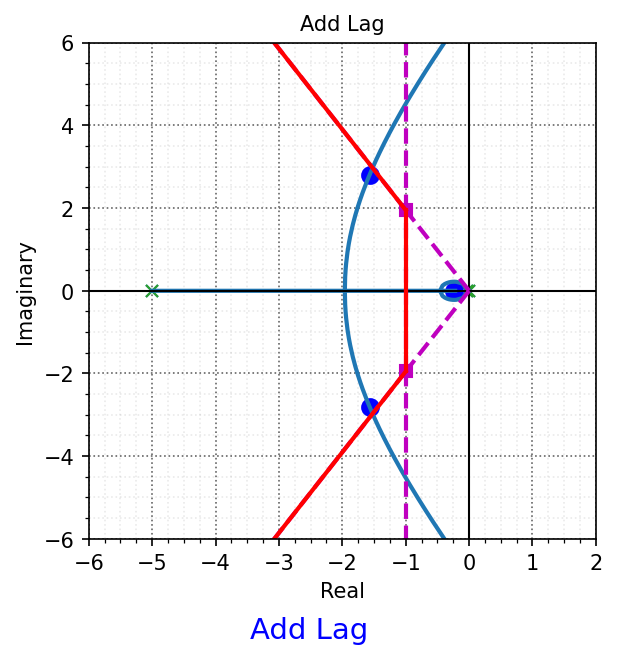

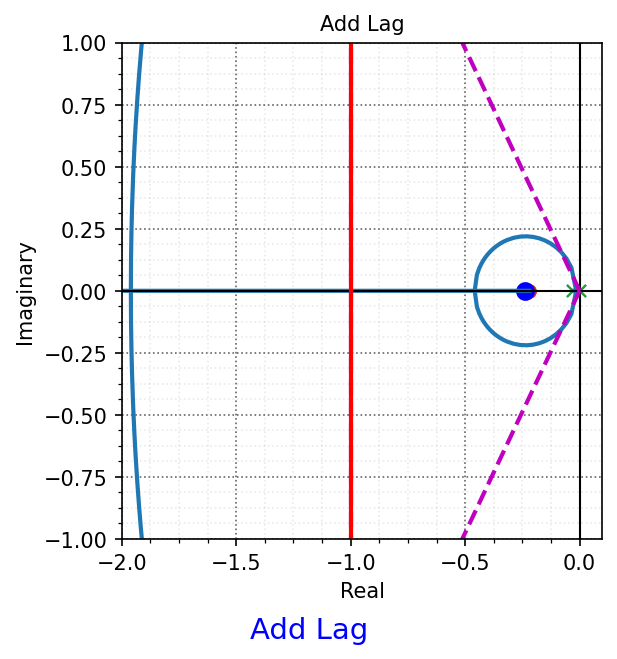

In [66]:
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(L,ax=ax,grid=False)
scl = rlocus(L,kvect=1,grid=False)
ax.plot(s0.real,s0.imag,'ms',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.set_xlim([-6, 2])
ax.set_ylim([-6, 6])
ax.set_title('Root Locus for P')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'m--')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')

plt.title("Add Lag")
caption("Add Lag",fig,yloc=-0.05)
savefig("./figs/L12_RL_des1a.pdf", dpi=600)
plt.show()

# zoom in
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(L,ax=ax,grid=False)
scl = rlocus(L,kvect=1,grid=False)
ax.plot(s0.real,s0.imag,'ms',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.set_xlim([-2, .1])
ax.set_ylim([-1, 1])
ax.set_title('Root Locus for P')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'m--')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')

plt.title("Add Lag")
caption("Add Lag",fig,yloc=-0.05)
savefig("./figs/L12_RL_des1a_zoomed.pdf", dpi=600)
plt.show()

Using Tp
omega_n: 	2.885
zeta   : 	0.435
Tr     : 	0.51s
Ts     : 	3.64s
Mp     : 	0.22
Tp     : 	1.21s
Yss    : 	1.02
Using self.SettlingTimeLimits[0] = 0.02


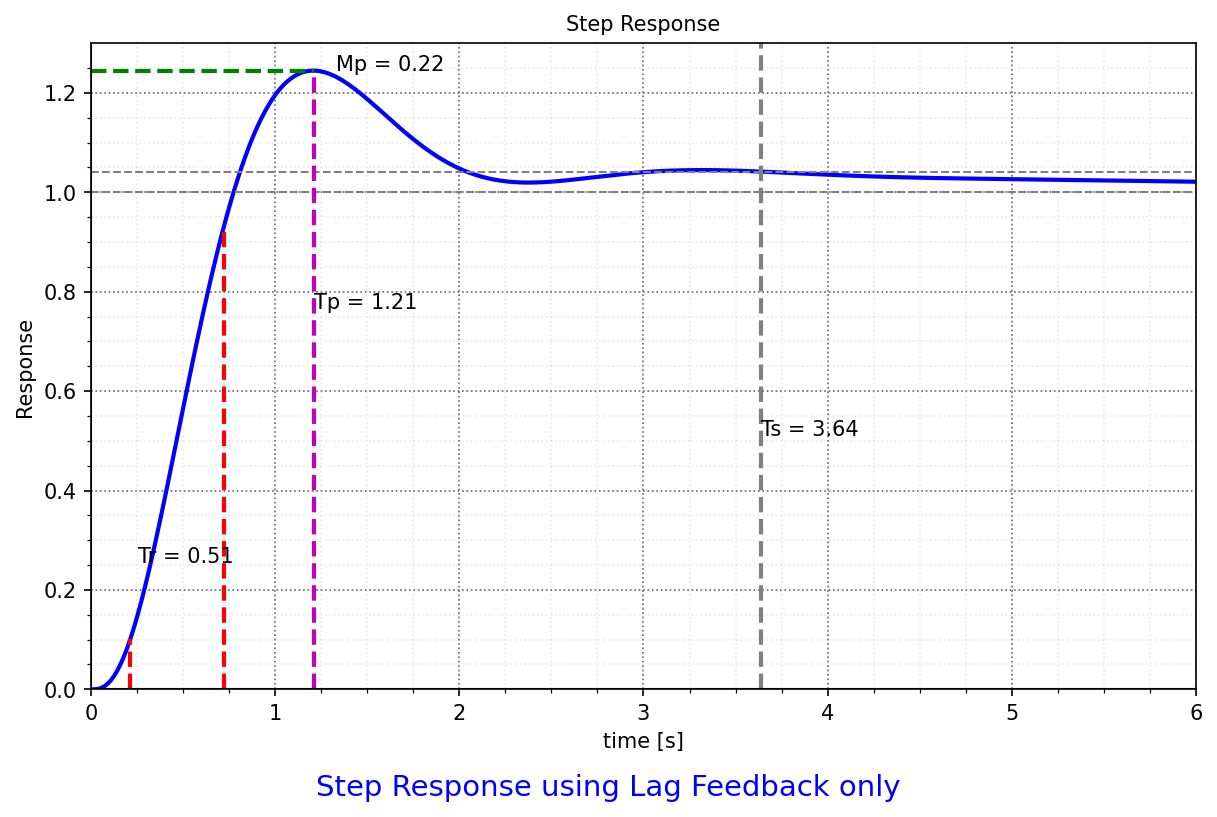

In [49]:
Gcl_lag = feedback(L,1)
y_lag,t_lag = step(Gcl_lag,6)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
S_lag = Step_info(t_lag,y_lag)
S_lag.printout()
S_lag.nice_plot(ax)
nicegrid(ax)
caption("Step Response using Lag Feedback only",fig,yloc=-0.05)
savefig("./figs/L12_RL_des1b.pdf", dpi=600)
plt.show()

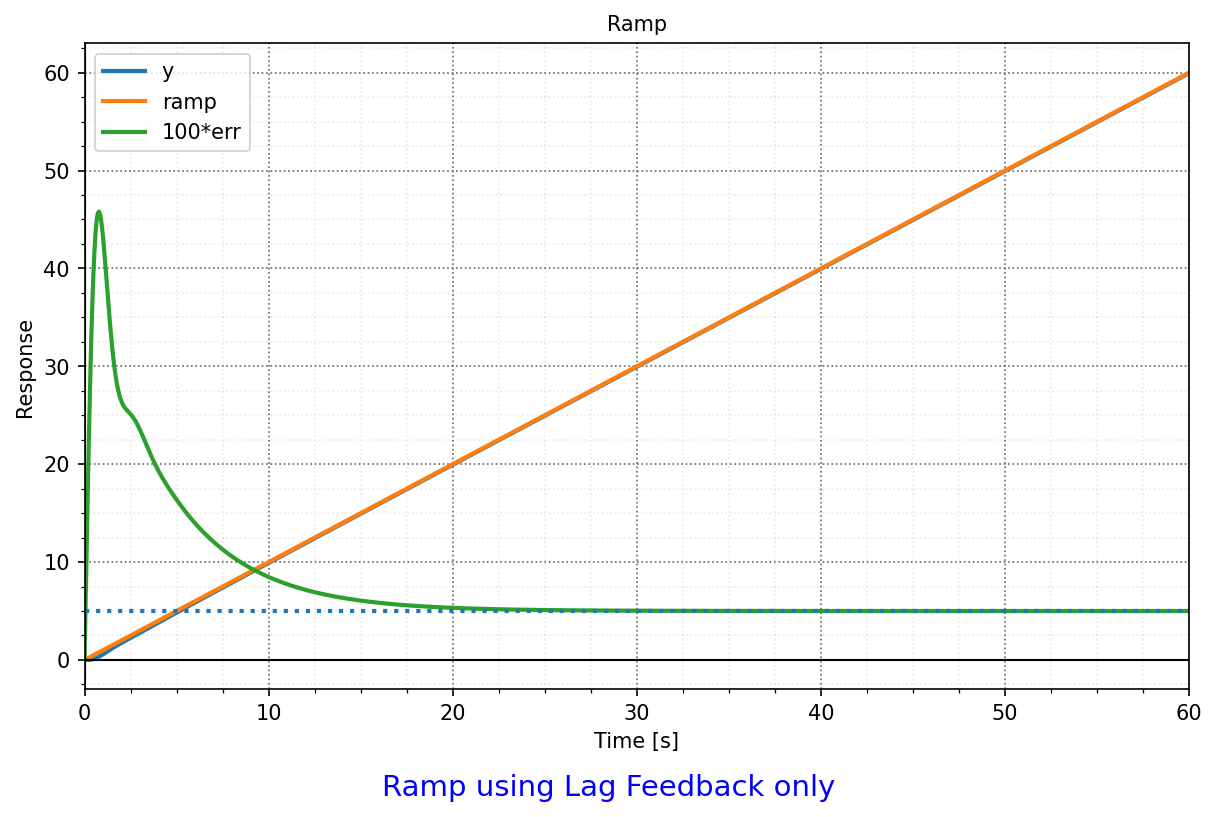

In [50]:
t = linspace(0,60,1000)
y_lag_ramp, t_lag_ramp, x_lag_ramp = lsim(Gcl_lag, T=t, U=t)

fig, ax = plt.subplots(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t_lag_ramp,y_lag_ramp,label='y')
plt.plot(t_lag_ramp,t_lag_ramp,label='ramp')
plt.plot(t_lag_ramp,100*(t_lag_ramp - y_lag_ramp),label='100*err')
plt.axhline(y=100/Kv_req,ls=':')
nicegrid(ax)
plt.title("Ramp")
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.legend()
caption("Ramp using Lag Feedback only",fig,yloc=-0.05)
savefig("./figs/L12_RL_des1c.pdf", dpi=600)
plt.show()

## Repeat RL Lag Design Above with tighter spec (10-29)

In [51]:
G = tf((0, 10), np.convolve((1,0),np.convolve((1,5),(1,10))))
Mp = 0.2
Ts = 1 # decreased from 4 in earlier design
#
zeta = np.sqrt(np.log(Mp)**2/(np.pi**2+np.log(Mp)**2))
#
wn = 4/zeta/Ts # 2%
wd = wn*np.sqrt(1-zeta**2)
# Target Poles
s0 = np.roots([1, 2*zeta*wn, wn**2])
print(f"{zeta= :.3f}")
print(f"{wn= :.3f}")
print(f"{wd= :.3f}")
s0 = np.roots([1, 2*zeta*wn, wn**2])

# Lead lag Design
Kdesign = 13 
Kv_req = 1/0.05
gamma = 20
b = abs(s0[0])/gamma
a =  b/(Kv_req/(G.num[0][0][-1]/G.den[0][0][-2])/Kdesign)

zeta= 0.456
wn= 8.773
wd= 7.808


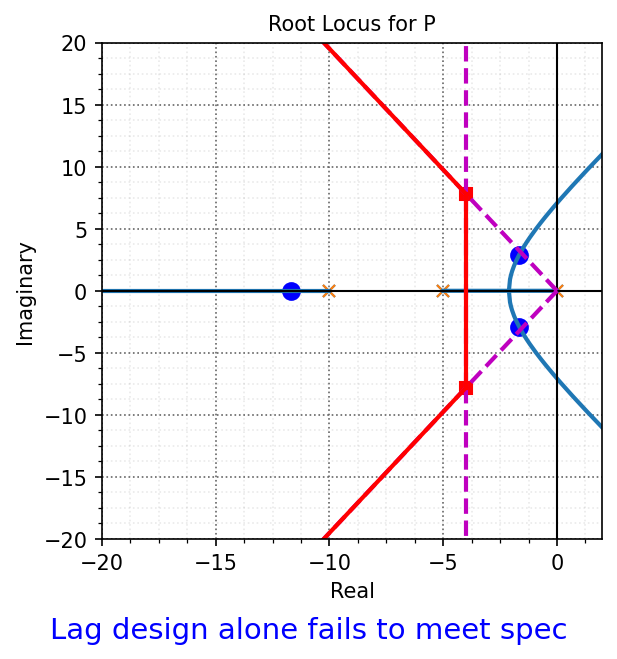

In [52]:
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(G,ax=ax,grid=False)
scl = rlocus(G,kvect=13,grid=False)
ax.plot(s0.real,s0.imag,'rs',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.set_xlim([-20, 2])
ax.set_ylim([-20, 20])
ax.set_title('Root Locus for P')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'m--')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')

caption("Lag design alone fails to meet spec",fig)
savefig("./figs/L12_RL_des2.pdf", dpi=600)
plt.show()

In [53]:
Gc_lead, scl = Root_Locus_design_cancel(G,s_target = s0[0], s_cancel = -5)
Lead_gain = np.squeeze(Gc_lag.num)[0]/np.squeeze(Gc_lag.den)[0]
print(f"{Lead_gain = :.3f}")
print(f"{Gc_lead.zeros()[0] = :.3f}")
print(f"{Gc_lead.poles()[0] = :.3f}")
L_lead = G*Gc_lead
Gc_lead
        
writefile(source+"Gc_10_30", Gc_lead)

Lead_gain = 13.000
Gc_lead.zeros()[0] = -5.000+0.000j
Gc_lead.poles()[0] = -46.482+0.000j


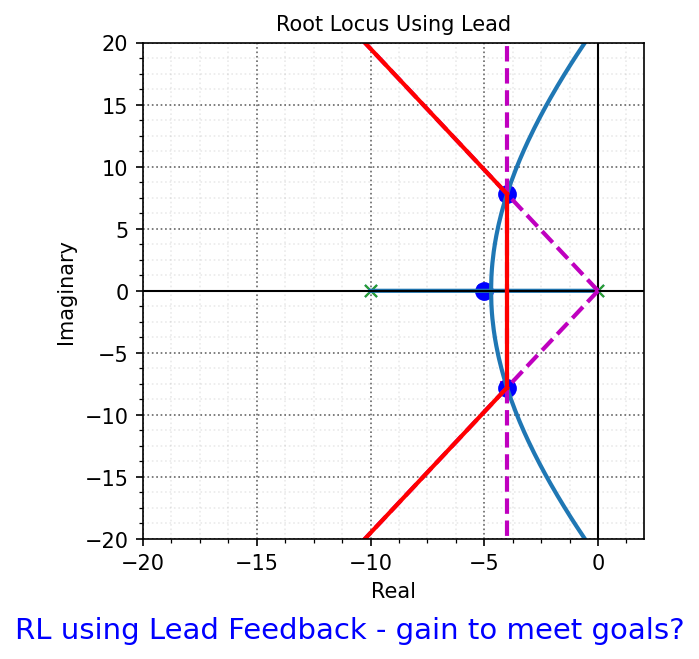

In [54]:
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(L_lead,ax=ax,grid=False)
scl = rlocus(L_lead,kvect=1,grid=False)
ax.plot(s0.real,s0.imag,'ms',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.set_xlim([-20, 2])
ax.set_ylim([-20, 20])
ax.set_title('Root Locus Using Lead')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'m--')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')

caption("RL using Lead Feedback - gain to meet goals?",fig,yloc=-0.05)
savefig("./figs/L12_RL_des2a.pdf", dpi=600)
plt.show()

In [55]:
# Repeat lag Design with plant (G*Gc_lead)
Kdesign = 1
Kv_req = 1/0.05
gamma = 30
b = abs(s0[0])/gamma
a =  b/(Kv_req/(L_lead.num[0][0][-1]/L_lead.den[0][0][-2])/Kdesign)
Gc_lag = Kdesign*tf((1, b), (1, a))
L_lead_lag = L_lead*Gc_lag

writefile(source+"Gc_10_31", Gc_lag)

Gc_lag

TransferFunction(array([   1.000,    0.292]), array([   1.000,    0.117]))

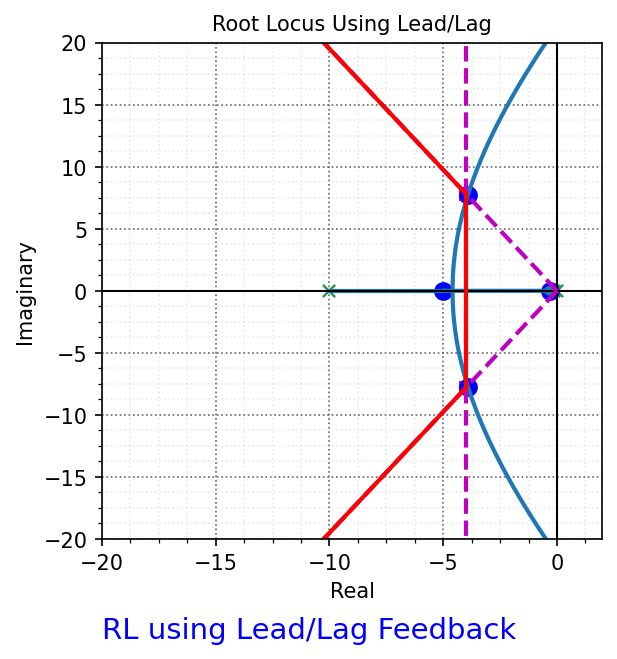

In [56]:
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(L_lead_lag,ax=ax,grid=False)
scl = rlocus(L_lead_lag,kvect=1,grid=False)
ax.plot(s0.real,s0.imag,'ms',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.set_xlim([-20, 2])
ax.set_ylim([-20, 20])
ax.set_title('Root Locus Using Lead/Lag')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'m--')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')

caption("RL using Lead/Lag Feedback",fig,yloc=-0.05)
savefig("./figs/L12_RL_des2aa.pdf", dpi=600)
plt.show()

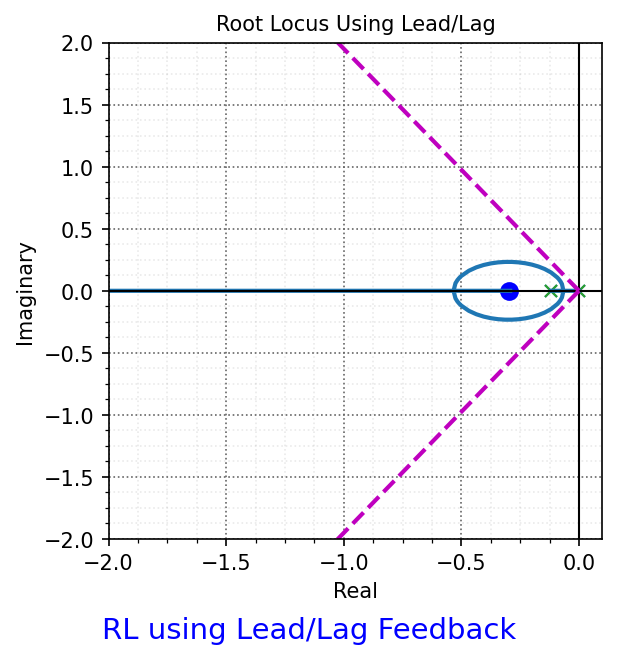

In [57]:
fig, ax = plt.subplots(figsize=(4, 4),dpi=150,constrained_layout = True)
rlocus(L_lead_lag,ax=ax,grid=False)
scl = rlocus(L_lead_lag,kvect=1,grid=False)
ax.plot(s0.real,s0.imag,'ms',ms=6)
ax.plot(scl[0].real,scl[0].imag,'bo',ms=8)
ax.set_xlim([-2, .1])
ax.set_ylim([-2, 2])
ax.set_title('Root Locus Using Lead/Lag')
nicegrid(ax)

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'m--')
plt.plot([-zeta*wn, -zeta*wn],[wd, 20],'m--')
plt.plot([-zeta*wn, -zeta*wn],[-wd, -20],'m--')
th = np.arctan(wd/(zeta*wn))
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'m--')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'m--')
plt.plot([-0, -zeta*wn],[0, wd],'m--')
plt.plot([-0, -zeta*wn],[0, -wd],'m--')

plt.plot([-zeta*wn, -zeta*wn],[-wd, wd],'r-')
plt.plot([-zeta*wn, -20],[zeta*wn*np.tan(th), 20*np.tan(th)],'r-')
plt.plot([-zeta*wn, -20],[-zeta*wn*np.tan(th), -20*np.tan(th)],'r-')

caption("RL using Lead/Lag Feedback",fig,yloc=-0.05)
savefig("./figs/L12_RL_des2aa_zoom.pdf", dpi=600)
plt.show()

Using Tp
omega_n: 	8.187
zeta   : 	0.440
Tr     : 	0.18s
Ts     : 	0.95s
Mp     : 	0.21
Tp     : 	0.43s
Yss    : 	1.01
Using self.SettlingTimeLimits[0] = 0.02


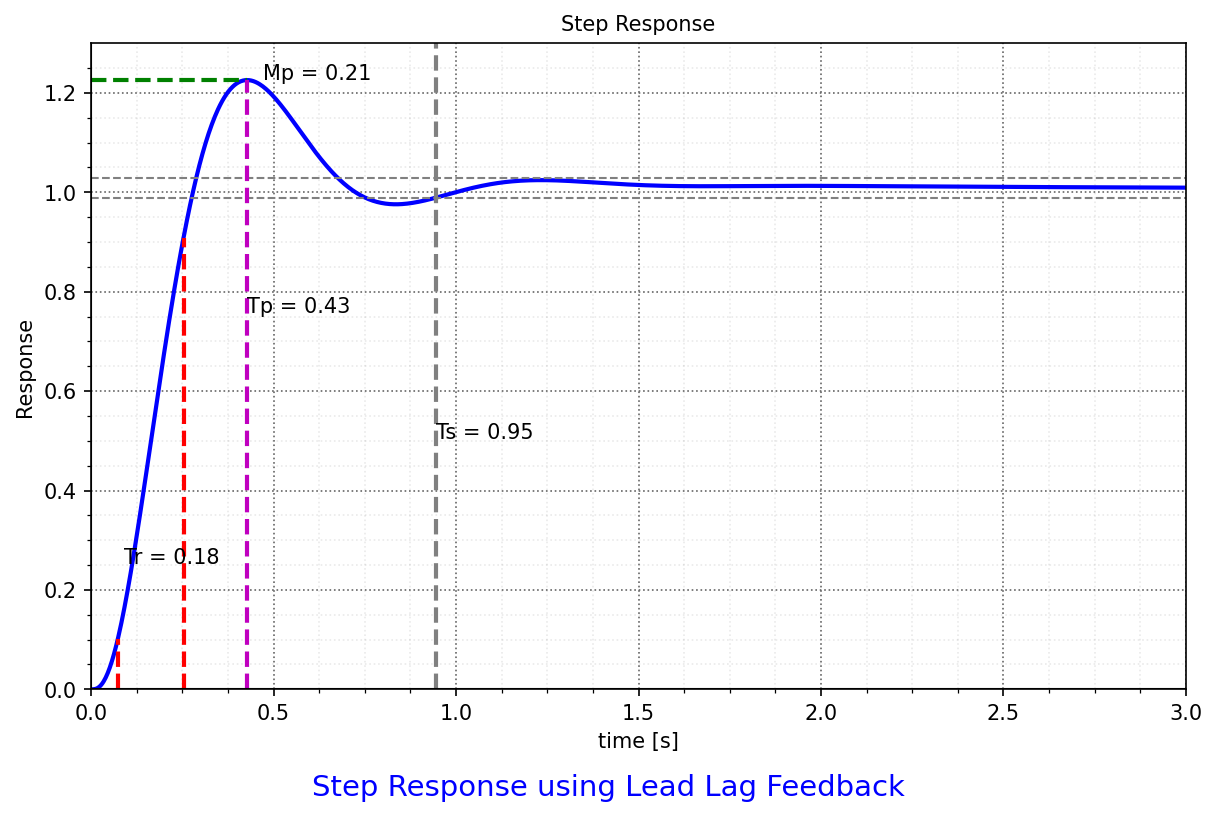

In [58]:
Gcl_lead_lag = feedback(L_lead_lag,1)
y_lead_lag,t_lead_lag = step(Gcl_lead_lag,3)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
S_lead_lag = Step_info(t_lead_lag,y_lead_lag)
S_lead_lag.printout()
S_lead_lag.nice_plot(ax)
nicegrid(ax)
caption("Step Response using Lead Lag Feedback",fig,yloc=-0.05)
savefig("./figs/L12_RL_des2b.pdf", dpi=600)
plt.show()

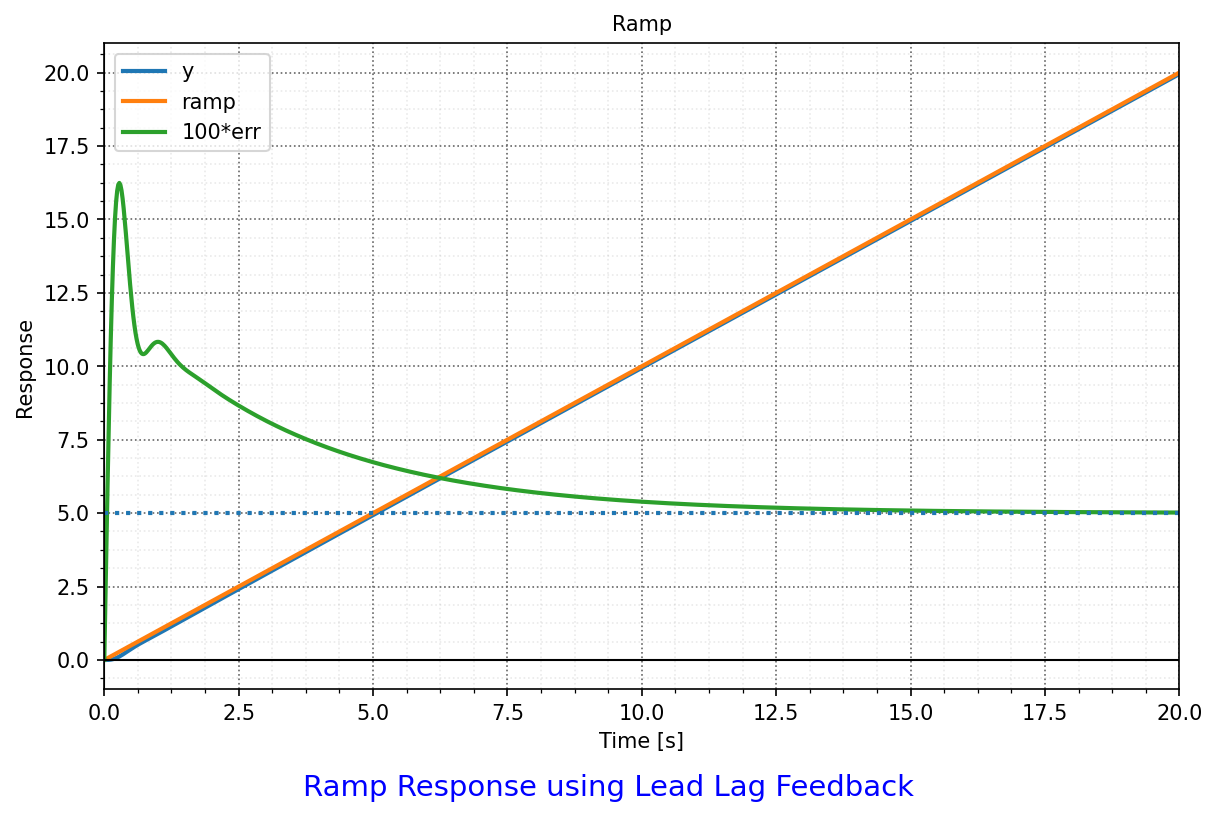

In [59]:
t = linspace(0,20,1000)
y_lead_lag_ramp, t_lead_lag_ramp, x_lead_lag_ramp = lsim(Gcl_lead_lag, T=t, U=t)

fig, ax = plt.subplots(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t_lead_lag_ramp,y_lead_lag_ramp,label='y')
plt.plot(t_lead_lag_ramp,t_lead_lag_ramp,label='ramp')
plt.plot(t_lead_lag_ramp,100*(t_lead_lag_ramp - y_lead_lag_ramp),label='100*err')
plt.axhline(y=100/Kv_req,ls=':')
nicegrid(ax)
plt.title("Ramp")
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.legend()
caption("Ramp Response using Lead Lag Feedback",fig,yloc=-0.05)
savefig("./figs/L12_RL_des2c.pdf", dpi=600)
plt.show()